In [2]:
# Goal: reproduce figures from the CVPR workshop paper using data stored in dataframes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import pickle
import os
from pathlib import Path
# import figures 
# from importlib import reload
# reload(figures)

In [3]:
directory = 'simulated_data/'
directory = r'C:\Basis_data'

if not os.path.isdir(directory):
    print('no such directory')

# 1. read the .csv file storing the results 
df = pd.read_csv(directory + r'\resultsDF.csv')

In [23]:
# 2. filter the rows of the table based on the case we are interested in. 
df_ignorers = df[ (df['c_trust'] == 0.5) ] 
display(df_ignorers)
# df_distr = df[ (df['reward_patch_dim'] == 1)] 
# display(df_distr)

df_ignorers_distr = df[ (df['c_trust'] == 0) & (df['reward_patch_dim'] == 1) ]  # note that 'and' operation doesn't work
df_ignorers_clust = df[ (df['c_trust'] == 0) & (df['reward_patch_dim'] == 4) ] 
df_comm_distr = df[ (df['c_trust'] == 0.5) & (df['reward_patch_dim'] == 1) ] 
df_comm_clust = df[ (df['c_trust'] == 0.5) & (df['reward_patch_dim'] == 4) ] 

# display(df_ignorers_distr)
display(df_comm_distr)

,Unnamed: 0,c_trust,sight_radius,reward_patch_dim,sim index,run index,time to first food,num birds failed
200,200,0.5,5.0,1.0,2.0,0,2.444444,0.0
201,201,0.5,5.0,1.0,2.0,1,2.000000,0.0
202,202,0.5,5.0,1.0,2.0,2,1.777778,0.0
203,203,0.5,5.0,1.0,2.0,3,1.666667,1.0
204,204,0.5,5.0,1.0,2.0,4,0.888889,2.0
...,...,...,...,...,...,...,...,...
395,395,0.5,5.0,4.0,3.0,95,4.777778,5.0
396,396,0.5,5.0,4.0,3.0,96,3.777778,1.0
397,397,0.5,5.0,4.0,3.0,97,2.555556,6.0
398,398,0.5,5.0,4.0,3.0,98,5.111111,7.0


,Unnamed: 0,c_trust,sight_radius,reward_patch_dim,sim index,run index,time to first food,num birds failed
200,200,0.5,5.0,1.0,2.0,0,2.444444,0.0
201,201,0.5,5.0,1.0,2.0,1,2.000000,0.0
202,202,0.5,5.0,1.0,2.0,2,1.777778,0.0
203,203,0.5,5.0,1.0,2.0,3,1.666667,1.0
204,204,0.5,5.0,1.0,2.0,4,0.888889,2.0
...,...,...,...,...,...,...,...,...
295,295,0.5,5.0,1.0,2.0,95,3.111111,0.0
296,296,0.5,5.0,1.0,2.0,96,1.333333,0.0
297,297,0.5,5.0,1.0,2.0,97,2.000000,0.0
298,298,0.5,5.0,1.0,2.0,98,1.444444,1.0


In [24]:
# Extra metadata parameters that should be read from a saved file.
N_timesteps = 50
N_agents = 9

In [26]:
# 3. For each experimental condition (simulation), pull out the values in the columns corresponding to success measures

# Distributed food statistics
timetofood_ignorers_distr = df_ignorers_distr['time to first food']
timetofood_comm_distr = df_comm_distr['time to first food']
numfailed_ignorers_distr = df_ignorers_distr['num birds failed']
numfailed_comm_distr = df_comm_distr['num birds failed']

# Clustered food statistics 
timetofood_ignorers_clust = df_ignorers_distr['time to first food']
timetofood_comm_clust = df_comm_distr['time to first food']
numfailed_ignorers_clust = df_ignorers_distr['num birds failed']
numfailed_comm_clust = df_comm_distr['num birds failed']

print(numfailed_comm_distr)

200    0.0
201    0.0
202    0.0
203    1.0
204    2.0
      ... 
295    0.0
296    0.0
297    0.0
298    1.0
299    1.0
Name: num birds failed, Length: 100, dtype: float64


In [27]:
# Run statistics 

#%% Mann-Whitney statistical tests to test for statistical significance of differences
# between two types of agents (Ignorers vs Communicators.)

# Environmental condition 1: Distributed food statistics 
#   Performance metric 1: Time to food 
mwu_time = stats.mannwhitneyu(timetofood_ignorers_distr, timetofood_comm_distr, method='auto', alternative='two-sided')

#   Performance metric 2: Number of birds that failed to reach food 
mwu_numfailed = stats.mannwhitneyu(numfailed_ignorers_distr, numfailed_comm_distr, method='auto', alternative='two-sided')

#%% Medians

# 1) Distributed food, Time to food
median_timetofood_ignorers = np.median(timetofood_ignorers_distr)
median_timetofood_communicators = np.median(timetofood_comm_distr)

# 2) Distributed food, Number of birds that failed
median_numbirdsfailed_ignorers = np.median(numfailed_ignorers_distr)
median_numbirdsfailed_communicators = np.median(numfailed_comm_distr)

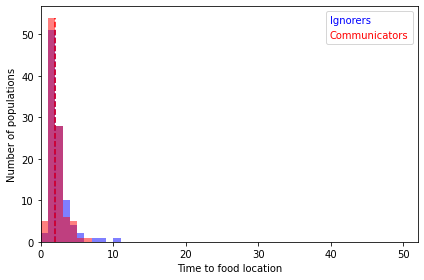

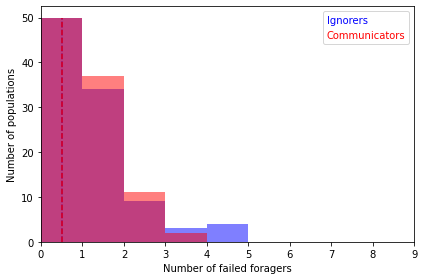

In [30]:
# TO DO: Make this section a function 

timetofood_ignorers = timetofood_ignorers_distr
timetofood_communicators = timetofood_comm_distr
numbirdsfailed_ignorers = numfailed_ignorers_distr
numbirdsfailed_communicators = numfailed_comm_distr

timetofood_ignorers = timetofood_ignorers_clust
timetofood_communicators = timetofood_comm_distr
numbirdsfailed_ignorers = numfailed_ignorers_distr
numbirdsfailed_communicators = numfailed_comm_distr


#%% Plots comparing Ignorers and Communicators for each condition

doLegend = True

# 1) Time to food
color_ignorers = 'blue'
color_communicators = 'red'
fig, ax = plt.subplots()
hist1data = ax.hist(timetofood_ignorers, bins=np.arange(N_timesteps + 2), color=color_ignorers, alpha=0.5, label='Ignorers')
hist2data = ax.hist(timetofood_communicators,  bins=np.arange(N_timesteps + 2),  color=color_communicators, alpha=0.5, label='Communicators')

ymin1, ymin2 = 0, 0
ymax1, ymax2 = np.max(hist1data[0]), np.max(hist2data[0]) 
ax.vlines(median_timetofood_ignorers, ymin1, ymax1, color=color_ignorers, linestyles='dashed')
ax.vlines(median_timetofood_communicators, ymin2, ymax2,  color=color_communicators, linestyles='dashed')
ax.set_xlabel('Time to food location')
ax.set_ylabel('Number of populations')
ax.set_xlim([0, N_timesteps+2 ])
ax.set_xticks(np.linspace(0, N_timesteps, 6).astype(int))
if doLegend:
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), 
          labelcolor=[color_ignorers, color_communicators], handlelength=0, handletextpad=0,)
# also try labelcolor='linecolor'
fig.tight_layout()

# 2) Number of birds that failed
fig, ax = plt.subplots()
hist1data = ax.hist(numbirdsfailed_ignorers, bins=np.arange(N_agents), color=color_ignorers, alpha=0.5, label='Ignorers')
hist2data = ax.hist(numbirdsfailed_communicators, bins=np.arange(N_agents),  color=color_communicators, alpha=0.5, label='Communicators')

ymin1, ymin2 = 0, 0
ymax1, ymax2 = np.max(hist1data[0]), np.max(hist2data[0]) 
ax.vlines(median_numbirdsfailed_ignorers, ymin1, ymax1, color=color_ignorers, linestyles='dashed')
ax.vlines(median_numbirdsfailed_communicators, ymin2, ymax2,  color=color_communicators, linestyles='dashed')
ax.set_xlabel('Number of failed foragers')
ax.set_ylabel('Number of populations')
ax.set_xlim([0, N_agents])
ax.set_xticks(np.linspace(0, N_agents, N_agents+1).astype(int))
if doLegend:
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), 
              labelcolor=[color_ignorers, color_communicators], handlelength=0, handletextpad=0,)
fig.tight_layout()
